## Problem Statement:
#### We are trying to identify key "driver" features/variables which act as strong indicators in weighing whether a loan application should be approved or rejected.

## Solution:

### Import the necessary libraries, load and understand the dataset:

In [626]:
#Import the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [627]:
#Load the loan dataset
loan_raw_df = pd.read_csv('loan.csv')
loan_raw_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<hr style="height:1px;background-color:#00ff00;" />

### Understanding the dataframe:

In [628]:
# Understanding the dataframe - shape:
loan_raw_df.shape

(39717, 111)

In [629]:
# Understanding the dataframe - dtypes:
loan_raw_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [630]:
# Understanding the dataframe - info():
loan_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [631]:
# Understanding the dataframe - describe():
loan_raw_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [632]:
# Understanding the dataframe - column names:
loan_raw_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [633]:
# Understanding the dataframe - index:
loan_raw_df.index

RangeIndex(start=0, stop=39717, step=1)

<hr style="height:1px;background-color:#00ff00;" />

### Data cleansing - Preprocess the data:

In [634]:
# As suggested in the Problem statement, "loan_status" appears as a potential target_column.

# Checking for missing_value(null) in this column:
loan_raw_df['loan_status'].isnull().sum()

0

In [635]:
# Understanding the distribution of this target column using groupby():
loan_raw_df.groupby(by=['loan_status']).size()

loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
dtype: int64

In [636]:
# It is clear from the output above, that we have some customers(1140) with loan_status as "Current". 
# Since these customers have neither fully_paid back the loan nor has charged_off as defaulter, it is wise to remove these customers from further analysis:

loan_df_with_fully_paid_and_charged_off = loan_raw_df[loan_raw_df['loan_status'] != 'Current']
loan_df_with_fully_paid_and_charged_off.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [637]:
# Cleaning columns with invalid data - int_rate - remove the '%' symbol:
loan_df_with_fully_paid_and_charged_off['int_rate'] = loan_df_with_fully_paid_and_charged_off['int_rate'].apply(lambda x: x.replace('%', ''))


# Cleaning columns with invalid data - term - remove the 'months' suffix:
loan_df_with_fully_paid_and_charged_off['term'] = loan_df_with_fully_paid_and_charged_off['term'].apply(lambda x: x.replace('months', ''))


# Cleaning columns with invalid data - emp_length - remove +, <, years, year etc:
loan_df_with_fully_paid_and_charged_off['emp_length'] = loan_df_with_fully_paid_and_charged_off['emp_length'].apply(lambda x: int(x.replace('+', '').replace('<',' ').replace('years', '').replace('year', '')) if isinstance(x, str) else x)

In [638]:
# Remove the columns with high degree of unique values. These columns would not be very helpful for our analysis:
# Identify columns with unique values:
unique_column_series = loan_df_with_fully_paid_and_charged_off.nunique()

columns_with_unique_values_to_be_deleted = unique_column_series[unique_column_series.values == 1].index
columns_with_unique_values_to_be_deleted

Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

In [639]:
loan_df_with_fully_paid_and_charged_off.drop(list(columns_with_unique_values_to_be_deleted), axis=1, inplace=True)

### Drop post-decision columns and verbose columns:

In [640]:
# Drop post decision columns. These are columns which doesn't add value in other decision making process:

verbose_columns_to_be_deleted = ['id', 'member_id', 'funded_amnt_inv', 'grade', 'sub_grade', 'url', 'title', 'zip_code',
                                   'addr_state', 'url']
post_decision_columns_to_be_deleted = ['collection_recovery_fee', 'recoveries']

# In-place Drop:
loan_df_with_fully_paid_and_charged_off.drop(verbose_columns_to_be_deleted, axis=1, inplace=True)
loan_df_with_fully_paid_and_charged_off.drop(post_decision_columns_to_be_deleted, axis=1, inplace=True)



In [641]:
# As we have now performed preliminary data pre-processing steps, its now a good time to see the missing values:

<hr style="height:1px;background-color:#00ff00;" />

### Missing Value Treatment:

### Identifying columns/features with missing values above a threshold percentage:

In [642]:
# Functions to calculate, display and drop missing values(columns/features) from the dataframe

def calculate_missing_value_percentage(pd_series):
    """ Function takes in a pandas series and calculates the percentage of null values in that column/series
    :params: pd_series: pandas_series: representing a column from dataframe.
    :returns: missing_value_percentage: float: representing the missing value percentage.
    """
    missing_value_percentage = round(100*(pd_series.isnull().sum()/len(pd_series.index)), 3)  # round-off to 3 decimals
    return missing_value_percentage


def get_df_with_missing_value_percentage(pd_dataframe):
    """ Function to display a pandas dataframe after removing missing_values
    :params: pd_dataframe: pandas_dataframe: representing dataframe.
    :returns missing_value_percentage_df: pandas_dataframe: representing missing_value.
    """
    # Missing value pandas series:
    missing_value_percentage_series = pd_dataframe.apply(calculate_missing_value_percentage)

    # Covert the above series to dataframe for further analysis:
    missing_value_percentage_df = pd.DataFrame({'Column Name':missing_value_percentage_series.index, 
                                                'Missing Value Percentage':missing_value_percentage_series.values})
    return missing_value_percentage_df


def get_columns_to_be_dropped(missing_value_percentage_df, percentage_threshold):
    """ Function to display the columns to be dropped based on missing_value percentage threshold
    :params missing_value_percentage_df: pandas_dataframe: representing the missing value dataframe
    :params percentage_threshold: float: representing the threshold beyond which the columns will be marked for dropping.
    :returns: columns_to_be_dropped:np_array: representing the columns to be dropped.
    
    """
    # Check the missing value dfs:
    missing_value_threshold_percentage = percentage_threshold  # This variable defines the threshold beyond which a column can safely be dropped.
    columns_to_be_dropped = missing_value_percentage_df.loc[missing_value_percentage_df['Missing Value Percentage'] >= missing_value_threshold_percentage, 'Column Name'].values

    # Columns to be dropped:
    print(f"Number of columns to be dropped: {columns_to_be_dropped.shape[0]}\n column_names to be dropped: {columns_to_be_dropped}")
    return columns_to_be_dropped

In [643]:
# Display the missing_values dataframe:
missing_value_percentage_df = get_df_with_missing_value_percentage(loan_df_with_fully_paid_and_charged_off)
missing_value_percentage_df

,Column Name,Missing Value Percentage
0,loan_amnt,0.000
1,funded_amnt,0.000
2,term,0.000
3,int_rate,0.000
4,installment,0.000
...,...,...
84,pub_rec_bankruptcies,1.807
85,tot_hi_cred_lim,100.000
86,total_bal_ex_mort,100.000
87,total_bc_limit,100.000


In [644]:
# Display the columns to be dropped from the dataframe:
threshold_percentage_of_missing_values_for_dropping_the_column = 30.0
columns_to_be_dropped = get_columns_to_be_dropped(missing_value_percentage_df, threshold_percentage_of_missing_values_for_dropping_the_column)

Number of columns to be dropped: 58
 column_names to be dropped: ['desc' 'mths_since_last_delinq' 'mths_since_last_record' 'next_pymnt_d'
 'mths_since_last_major_derog' 'annual_inc_joint' 'dti_joint'
 'verification_status_joint' 'tot_coll_amt' 'tot_cur_bal' 'open_acc_6m'
 'open_il_6m' 'open_il_12m' 'open_il_24m' 'mths_since_rcnt_il'
 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m' 'max_bal_bc'
 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_cu_tl' 'inq_last_12m'
 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy' 'bc_util'
 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op' 'mo_sin_rcnt_rev_tl_op'
 'mo_sin_rcnt_tl' 'mort_acc' 'mths_since_recent_bc'
 'mths_since_recent_bc_dlq' 'mths_since_recent_inq'
 'mths_since_recent_revol_delinq' 'num_accts_ever_120_pd' 'num_actv_bc_tl'
 'num_actv_rev_tl' 'num_bc_sats' 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl'
 'num_rev_accts' 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_120dpd_2m'
 'num_tl_30dpd' 'num_tl_90g_dpd_24m' 'num_tl_op_past_12m' 'pct_tl_nvr_dlq'

### Drop the columns with missing_value > threshold (30%)

In [645]:
# Drop the columns from the df and save a copy as loan_df_columns_dropped for further processing:
loan_df_columns_dropped = loan_df_with_fully_paid_and_charged_off.drop(columns_to_be_dropped, axis=1)  # Axis 1 represents column drop:
loan_df_columns_dropped.shape

(38577, 31)

In [646]:
# Take a look at the df now: 
loan_df_columns_dropped.head()
loan_df_columns_dropped.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

### Are there columns with missing_values less than threshold:


In [647]:
loan_df_columns_dropped.isnull().sum()[loan_df_columns_dropped.isnull().sum() > 0].sort_values(ascending=False)

emp_title               2386
emp_length              1033
pub_rec_bankruptcies     697
last_pymnt_d              71
revol_util                50
last_credit_pull_d         2
dtype: int64

In [648]:
get_df_with_missing_value_percentage(loan_df_columns_dropped).sort_values(by= 'Missing Value Percentage', ascending=False)

,Column Name,Missing Value Percentage
5,emp_title,6.185
6,emp_length,2.678
30,pub_rec_bankruptcies,1.807
27,last_pymnt_d,0.184
20,revol_util,0.130
29,last_credit_pull_d,0.005
17,open_acc,0.000
28,last_pymnt_amnt,0.000
26,total_rec_late_fee,0.000
25,total_rec_int,0.000


#### Treat each of the column separately:

In [649]:
# Impute only for columns - emp_title, emp_length and pub_rec_bankruptcies as only these columns have missing_values > 1 %.
# Other columns can be ignored due to very low missing_value percentage:

#### Treating "emp_title" column:

In [650]:
# emp_title is a "discrete categorical" column since it represents the "The job title supplied by the Borrower when applying for the loan(from data dict provided)".
# Therefore, the suggested imputation strategry is "mode". Mode represents the highest occuring categorical value in the dataset. In this case its "US Army":
mode_emp_title = loan_df_columns_dropped['emp_title'].mode()[0]
loan_df_columns_dropped['emp_title'].fillna(mode_emp_title, inplace=True)

In [651]:
loan_df_columns_dropped.isnull().sum()[loan_df_columns_dropped.isnull().sum() > 0].sort_values(ascending=False)

emp_length              1033
pub_rec_bankruptcies     697
last_pymnt_d              71
revol_util                50
last_credit_pull_d         2
dtype: int64

#### Treating "emp_length" column:

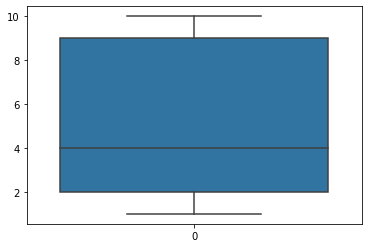

In [652]:
# emp_length is a "continuous" column since it represents the "Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. (from data dict provided)".
# Therefore, applying an imputation strategy of "mean" or "median" would be recommended. Here is check if the said column contains any outliers.
# If outliers are present, we will apply "median", else we will apply "mean" imputation strategy.

# Looking for outliers in emp_length:
sns.boxplot(data=loan_df_columns_dropped['emp_length'])
plt.show()

In [653]:
# From the boxplot above, it is clear that we do NOT have any outliers, so we will proceed with "mean" imputation strategy:
mean_emp_length = loan_df_columns_dropped['emp_length'].mean()
loan_df_columns_dropped['emp_length'].fillna(mean_emp_length, inplace = True)

In [654]:
# Recheck the null value columns again:
loan_df_columns_dropped.isnull().sum()[loan_df_columns_dropped.isnull().sum() > 0].sort_values(ascending=False)

pub_rec_bankruptcies    697
last_pymnt_d             71
revol_util               50
last_credit_pull_d        2
dtype: int64

In [655]:
loan_df_columns_dropped['emp_length'].isnull().sum()

0

#### Treating "pub_rec_bankruptcies" column:

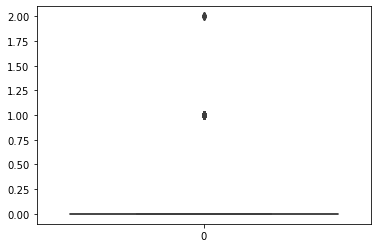

In [656]:
# pub_rec_bankruptcies is a "continuous" column since it represents the "Number of public record bankruptcies (from data dict provided)".
# Therefore, applying an imputation strategy of "mean" or "median" would be recommended. Here is check if the said column contains any outliers.
# If outliers are present, we will apply "median", else we will apply "mean" imputation strategy.

# Looking for outliers in pub_rec_bankruptcies:
sns.boxplot(data=loan_df_columns_dropped['pub_rec_bankruptcies'])
plt.show()

In [657]:
# From the boxplot above, it is clear that we HAVE outliers, so we will proceed with "median" imputation strategy:
median_pub_rec_bankruptcies = loan_df_columns_dropped['pub_rec_bankruptcies'].median()
loan_df_columns_dropped['pub_rec_bankruptcies'].fillna(median_pub_rec_bankruptcies, inplace = True)

In [658]:
# Recheck the null value columns again:
loan_df_columns_dropped.isnull().sum()[loan_df_columns_dropped.isnull().sum() > 0].sort_values(ascending=False)

last_pymnt_d          71
revol_util            50
last_credit_pull_d     2
dtype: int64

In [659]:
# Above columns can be ignored due to very low missing_value percentage, less than 1 % missing values

### Identifying rows with missing values:

In [660]:
loan_df_columns_dropped.isnull().sum(axis=1).value_counts()


0    38458
1      115
2        4
dtype: int64

In [661]:
# The above output shows that there are NO rows with more than 4 null columns/features.
# Out of 53 columns being consider, missing value in 3 columns is acceptable with no need to drop/impute these records.

<hr style="height:1px;background-color:#00ff00;" />

### Checking for duplicate records, before proceeding for EDA:

In [662]:
loan_df_columns_dropped.duplicated().value_counts()

False    38577
dtype: int64

In [663]:
# No duplicates found! Good to proceed to EDA:

<hr style="height:1px;background-color:#00ff00;" />

### Adding few derived columns/features:

In [664]:
# Since the target_column "loan_status" is a categorical column, it woould be helpful to have a column with the numeric representations for the same:
# 1 means defaulter:
loan_df_columns_dropped['numeric_loan_status'] = loan_df_columns_dropped['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [665]:
loan_df_columns_dropped['numeric_loan_status'].value_counts()

0    32950
1     5627
Name: numeric_loan_status, dtype: int64

In [724]:
# We have a loan issue date which could be further broken down to month and year:
loan_df_columns_dropped['issue_d'].value_counts().head()
 
# But the data dict is not very clear on the format. It could be interpretted as "year-Month" or as "date-Month". So not extracting the issue_d.

11-Nov    2062
11-Dec    2042
11-Oct    1941
11-Sep    1913
11-Aug    1798
Name: issue_d, dtype: int64

<hr style="height:1px;background-color:#00ff00;" />

## EDA (Exploratory Data Analysis):

### Univariate Analysis:

In [770]:
# Check the df again:
loan_df_columns_dropped.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,numeric_loan_status,issue_month,issue_year
0,5000,5000,36,10.65,162.87,US Army,10.0,RENT,24000.0,Verified,...,5000.00,863.16,0.00,15-Jan,171.62,16-May,0.0,0,11,20Dec
1,2500,2500,60,15.27,59.83,Ryder,1.0,RENT,30000.0,Source Verified,...,456.46,435.17,0.00,13-Apr,119.66,13-Sep,0.0,1,11,20Dec
2,2400,2400,36,15.96,84.33,US Army,10.0,RENT,12252.0,Not Verified,...,2400.00,605.67,0.00,14-Jun,649.91,16-May,0.0,0,11,20Dec
3,10000,10000,36,13.49,339.31,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,...,10000.00,2214.92,16.97,15-Jan,357.48,16-Apr,0.0,0,11,20Dec
5,5000,5000,36,7.90,156.46,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,...,5000.00,632.21,0.00,15-Jan,161.03,16-Jan,0.0,0,11,20Dec


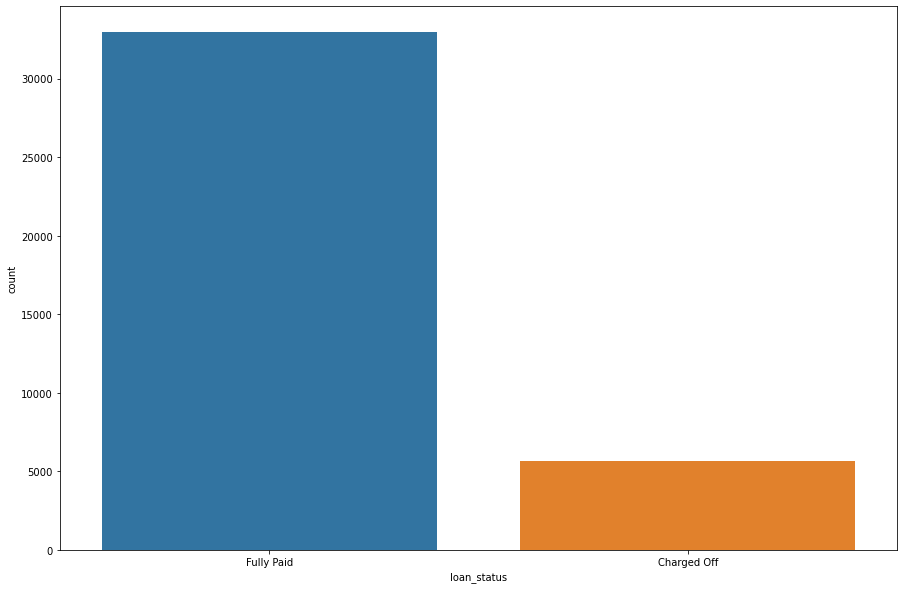

In [747]:
# Begin the visualization with the basic count of records under "loan_status" category:
plt.figure(figsize=(15, 10))
sns.countplot(x = 'loan_status', data = loan_df_columns_dropped)
plt.show()

In [678]:
# Observation:
# It is evident that the number of defaulters is comparatively less than number of non-defaulters, which is always a health sign for a lending institute.

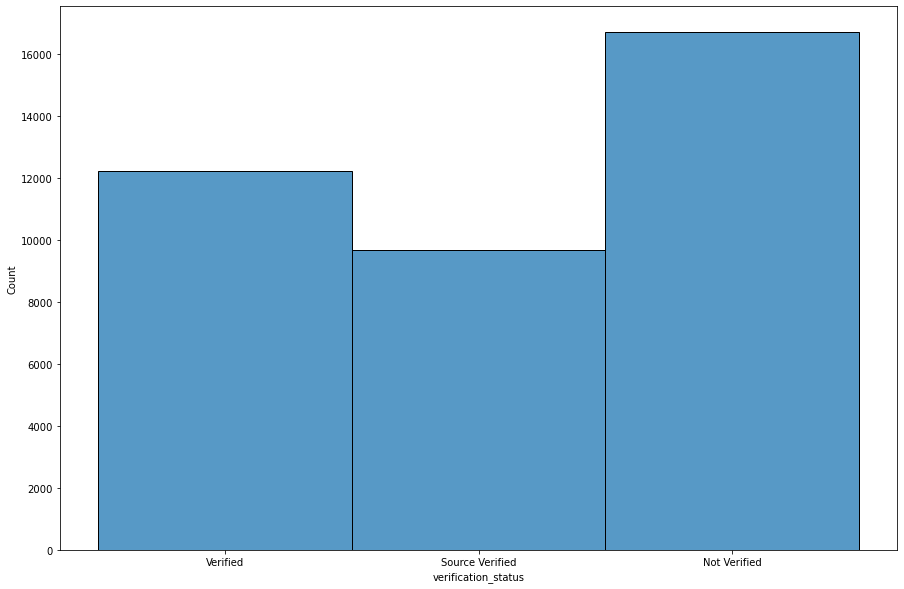

In [764]:
plt.figure(figsize=(15, 10))
sns.histplot(x="verification_status", data=loan_df_columns_dropped)
plt.show()

In [ ]:
# Observation:
# It is evident that the number of NOT VERIFIED loans provided are more than verified loans. This could trickle down to defaulters in future.

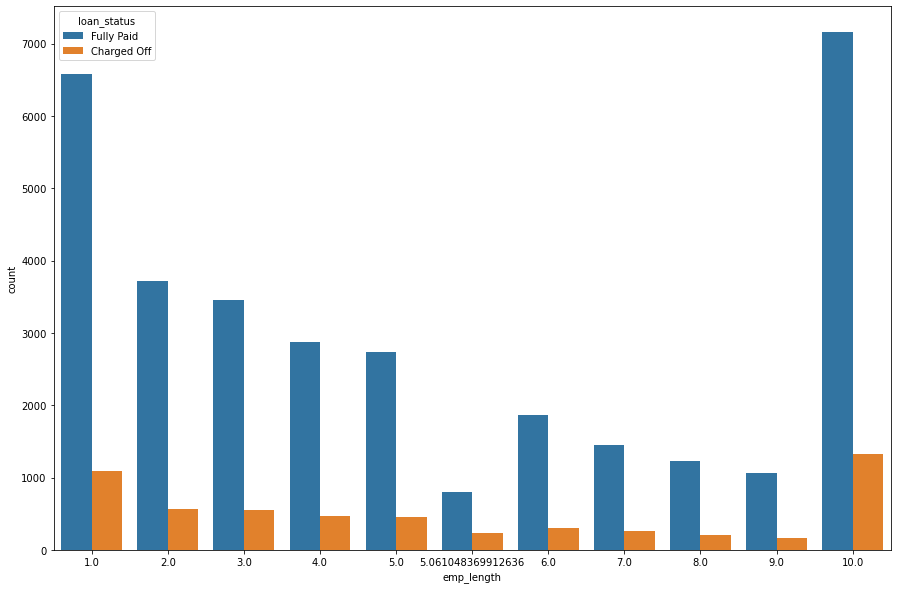

In [759]:
plt.figure(figsize=(15, 10))
sns.countplot(x = 'emp_length', hue= 'loan_status', data=loan_df_columns_dropped)
plt.show()

In [772]:
# Applicants with employement length of less than or equal to 1 year & employees with 10 years of employment are the highest potential defaulters.

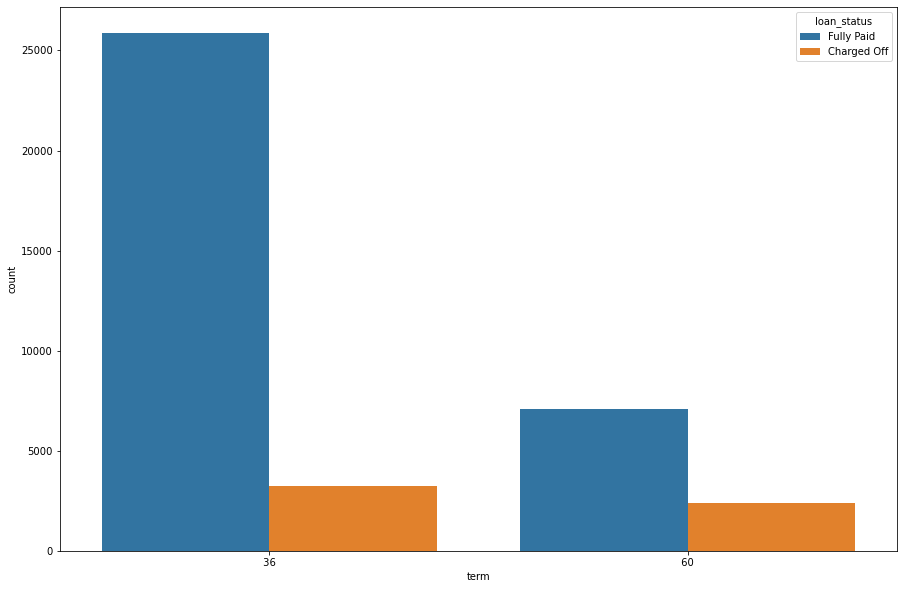

In [784]:
plt.figure(figsize=(15,10))
sns.countplot(data=loan_df_columns_dropped, hue='loan_status',x='term')
plt.show()

In [785]:
# Number of defaulters are more for shorter term loans(36 months), compared to longer term loans.

### Bivariate analysis:

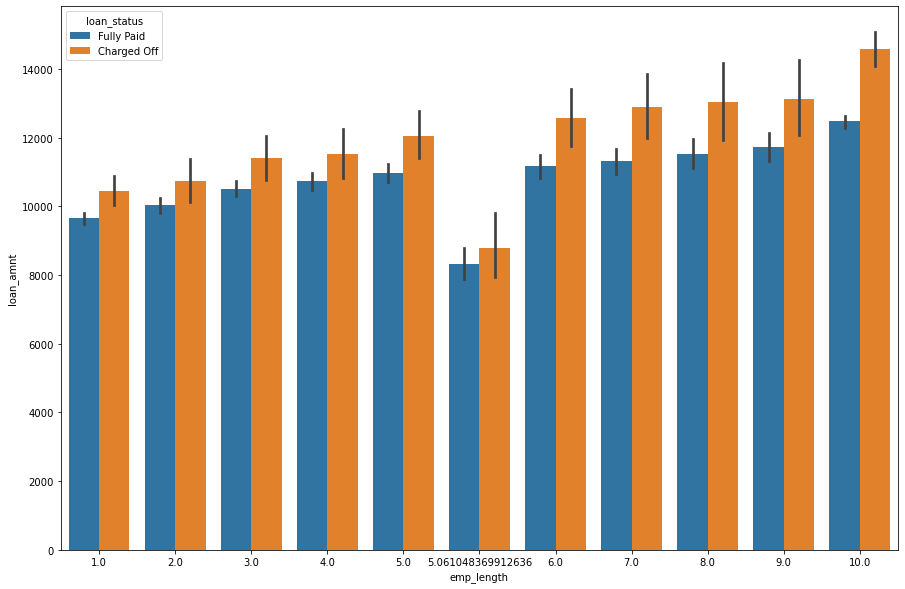

In [769]:
plt.figure(figsize=(15, 10))
sns.barplot(data=loan_df_columns_dropped, y='loan_amnt', x='emp_length', hue='loan_status')
plt.show()

In [781]:
# Employees with longer employment_length tend to apply for larger loan_amounts. But they also endup defaulting more.
# Thus, it cannot be concluded that applicants with longer employment_length end up fully_repaying the loan.

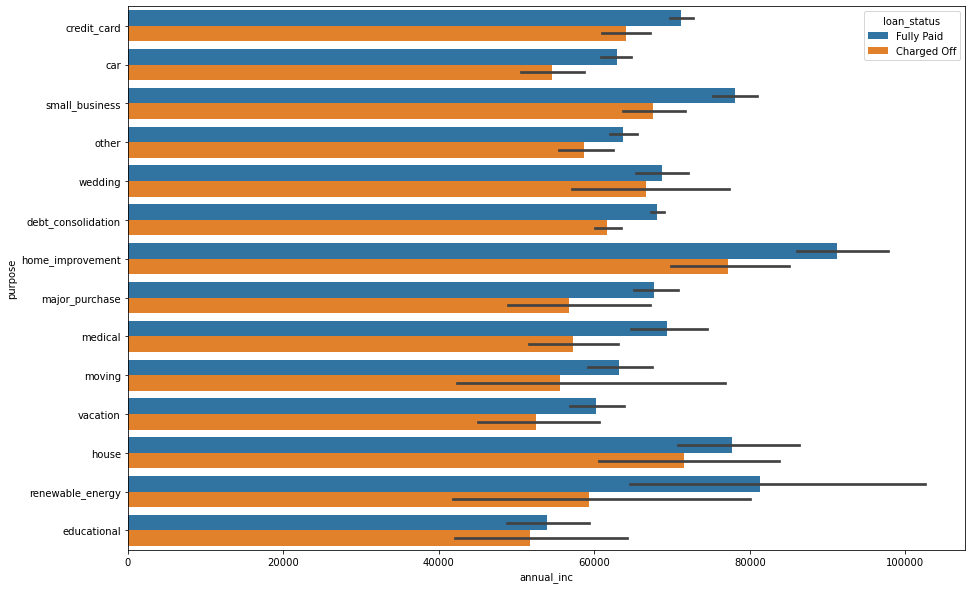

In [743]:
plt.figure(figsize=(15,10))
sns.barplot(data=loan_df_columns_dropped,x='annual_inc', y='purpose', hue ='loan_status')
plt.show()

In [ ]:
# While it comes to "home_improvement" loans, it is better to consider applicants with higher annual_incomes for loan approval.
# Where as, when it comes to "education" loans, even lower annual_income applicants can be considered for approval.

### Multivariate analysis:

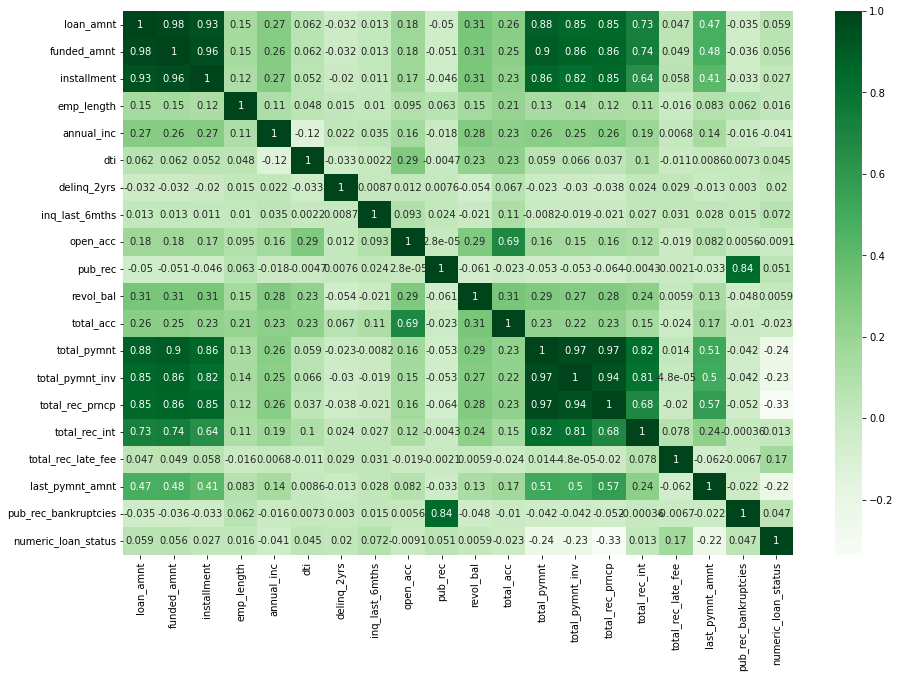

In [782]:
plt.figure(figsize=(15, 10))
loan_df_columns_dropped_correlated = loan_df_columns_dropped.corr()
sns.heatmap(loan_df_columns_dropped_correlated, cmap="Greens", annot=True)
plt.show()

In [783]:
# Corelation Observation:

# The is a slight negative correlation between "annual_income" and "dti(debt to income ratio)". Loan applicants with higher annual income are slightly better candidates for loan approval.
# The "loan_amnt" applied has almost no correlation with the "employment_length". Hence employees working for longer years cannot be considered as strong candidates for higher loan amounts.


### Segmented Univariate analysis:

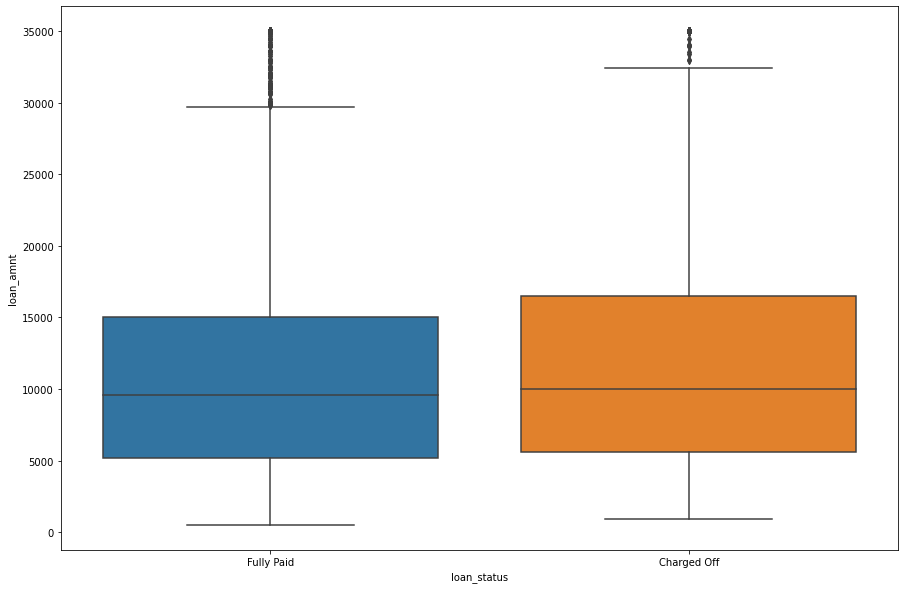

In [756]:
# Compare and contrast the box plot for both the "loan_status" to understand the univariate relationship of "loan_ammount":
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_df_columns_dropped)
plt.show()

In [758]:
# Observation:
# It is evident that the loan_amount in case of "defaulters/charged-off" was indeed noticiably high compared to that of the non-defaulter.
# Thus, higher loan amount applications can end up defaulting more.

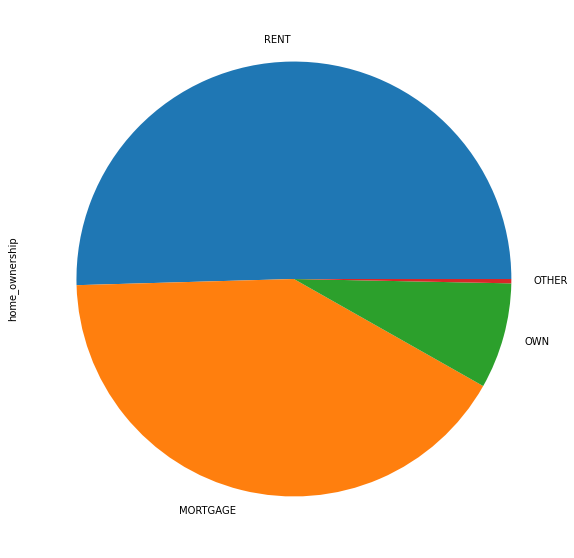

In [757]:
# Lets segment the target_column into 2 separate dataframes:
loan_df_fully_paid = loan_df_columns_dropped[loan_df_columns_dropped['numeric_loan_status'] == 0]
loan_df_charged_off = loan_df_columns_dropped[loan_df_columns_dropped['numeric_loan_status'] == 1]


# Pie chart for home_ownership type:
plt.figure(figsize=(15, 10))
loan_df_charged_off['home_ownership'].value_counts().plot.pie()
plt.show()

In [ ]:
# Piechart Observation:
# Amongst the defaulters, it is evident that more than 75% defaulter reside in "rented or mortage" home_ownership.
# Thus it is better to consider applicants with "OWN" houses for approval.

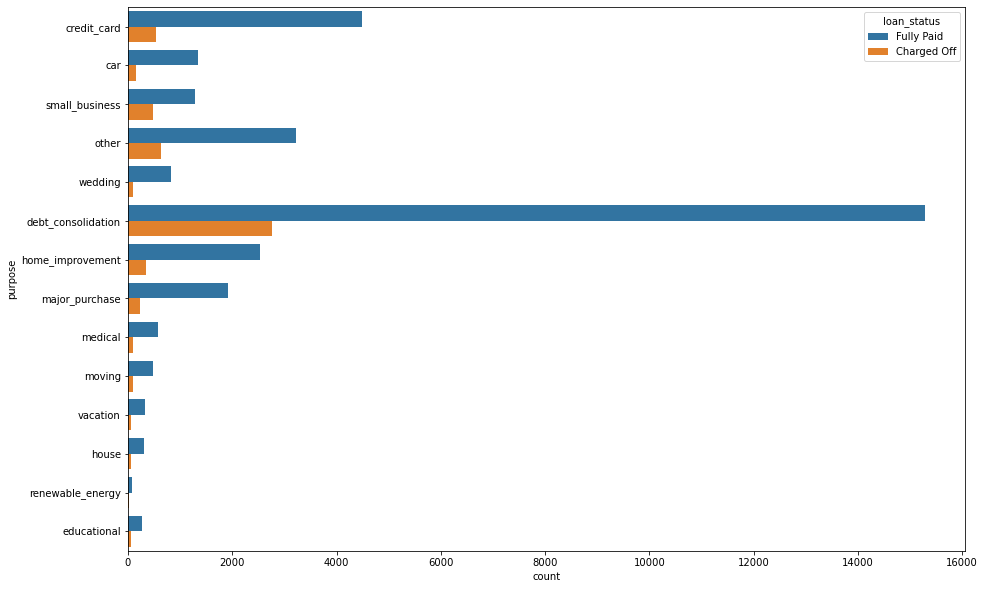

In [777]:
plt.figure(figsize=(15,10))
sns.countplot(data=loan_df_columns_dropped, hue='loan_status',y='purpose')
plt.show()

In [773]:
# Observation:
# Amongst the defaulters, it is evident that debt_consolidation is leading "purpose" of defaulted loans. However, the count of applicant for debt_consolidation is also higher and 
# hence cannot be concluded that "debt_consolidation" purpose will end up defaulting.

<Figure size 1080x720 with 0 Axes>

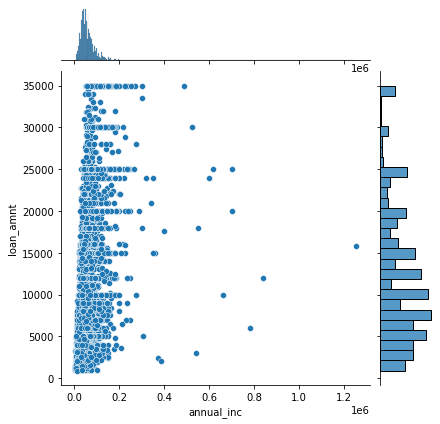

In [779]:
plt.figure(figsize=(15, 10))
sns.jointplot('annual_inc', 'loan_amnt', loan_df_charged_off)
plt.show()

In [ ]:
# Lower annual_income applicants applying for lower loan amounts tend to default more.